In [56]:
import pandas as pd
weights = pd.read_excel('Mueesli_new_data.xlsx')
weights.head(5)

,weight
0,506
1,512
2,494
3,496
4,510


# Schritt 1
Zusatzannahme: Die Verteilungen der einzelnen Messungen $X_1, X_2, ..., X_n$ sind normalverteilt mit unbekanntem Erwartungswert µ und  Varianz $σ^2$.

Wird ganz am Schluss noch überprüft.

# Schritt 2
$\mu_0 = 500g$

$H_0: \mu \leq \mu_0$

$H_A: \mu > \mu_0$

In [57]:
mu0 = 500

# Schritt 3

Mit scipy wird die Teststatistik sowie der p-Wert gleichzeitig berechnet.

Die Teststatistik:

 $\displaystyle z = \frac{\overline{x} - \mu_0}{s/\sqrt{n}}$

In [58]:
import scipy.stats

test_statistic, p_wert = scipy.stats.ttest_1samp(weights, mu0, alternative="greater")
test_statistic

array([1.93969489])

# Schritt 4
Der zugehörige $p$-Wert ergab sich bereits.

$p$-Wert = $P(Z \geq z)= 1- P(Z\leq z)$.

In [59]:
p_wert

array([0.02909227])

# Schritt 5
Da kein Signifikanzniveau angegeben ist, nehmen wir $\alpha = 0.05$.

In [60]:
alpha = 0.05

# Schritt 6
Gemäss Formel:

$
[x_{\text{lower\_limit}}, x_{\text{upper\_limit}}] =
\left[ \bar{x} - z_{0.95} \cdot \frac{s}{\sqrt{n}},\ \infty \right)
$

In $95\%$ der Fällen wird ein Mittelwert gemessen,
der im unteren Interval liegt.



In [61]:
import statsmodels.stats.api as sms
sms.DescrStatsW(weights).tconfint_mean(alpha=0.05, alternative='larger')

(array([500.20620711]), inf)

# Schritt 7
Da $p$-Wert $< \alpha$ ist, wird die Nullhypothese $H_0$ verworfen.

In [62]:
if p_wert < alpha:
    print("Verwerfen von H0")
else:
    print("Nicht verwerfen von H0")


Verwerfen von H0


# Überprüfen der Zusatzannahme
Damit wir uns sicher sein können, dass die Verteilungen der einzelnen Messungen $X_1, X_2, ..., X_n$
annähernd normalverteilt sind, können wir einen QQ-Plot erstellen.

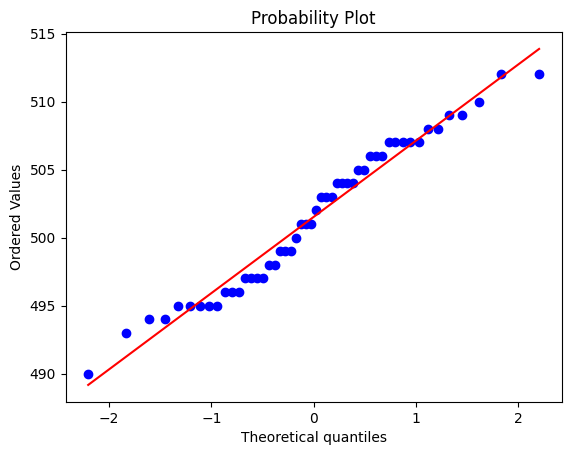

In [63]:
import matplotlib.pyplot as plt

scipy.stats.probplot(weights.weight, dist="norm", plot=plt)
plt.show()

Um die Normalverteilung zu überprüfen, werden folgende Tests durchgeführt:
1. Shapiro-Wilk-Test
2. D’Agostino-Pearson-Test (normaltest)
3. Anderson-Darling-Test

In [64]:
from scipy.stats import anderson, normaltest, shapiro

stat, p = shapiro(weights["weight"])
print(f'Statistik={stat:.4f}, p-Wert={p:.4f}')
if p > alpha:
    print('annähernd normalverteilt (p > 0.05)')
else:
    print('signifikant NICHT normalverteilt (p <= 0.05)')


Statistik=0.9630, p-Wert=0.1182
annähernd normalverteilt (p > 0.05)


In [65]:
stat, p = normaltest(weights["weight"])
print(f'Statistik={stat:.4f}, p-Wert={p:.4f}')
if p > alpha:
    print('wahrscheinlich normalverteilt (p > 0.05)')
else:
    print('wahrscheinlich NICHT normalverteilt (p <= 0.05)')

Statistik=6.3912, p-Wert=0.0409
wahrscheinlich NICHT normalverteilt (p <= 0.05)


In [66]:
result = anderson(weights["weight"])
print(f'Statistik: {result.statistic:.4f}')
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print(f'Für {sl}% Signifikanzniveau: normalverteilt (Statistik < {cv})')
    else:
        print(f'Für {sl}% Signifikanzniveau: NICHT normalverteilt (Statistik >= {cv})')

Statistik: 0.7094
Für 15.0% Signifikanzniveau: NICHT normalverteilt (Statistik >= 0.538)
Für 10.0% Signifikanzniveau: NICHT normalverteilt (Statistik >= 0.613)
Für 5.0% Signifikanzniveau: normalverteilt (Statistik < 0.736)
Für 2.5% Signifikanzniveau: normalverteilt (Statistik < 0.858)
Für 1.0% Signifikanzniveau: normalverteilt (Statistik < 1.021)


## Interpretation
Daten sind nicht perfekt normalverteilt, aber auch nicht stark abweichend. Für den t-Test ist das in Ordnung. (vor allem da Stichprobe > 30)